In [ ]:
# Iteractuar con el sistema operativo
import os
# Proporciona operaciones de coincidencia de expresiones regulares
import re
# Encuentra todos los nombres de ruta que coinciden con un patrón
from glob import glob
# Crear un ID único
from uuid import uuid1
# comprimir o descomprimir archivos .ZIP
from zipfile import ZipFile

# pandas con alias "pd"
import pandas as pd


# **Descomprimir y obtener los archivos .csv requerido**


In [ ]:
# Ruta del archivo
PATH='input/2022-03-30.zip'

def decompress_unzip(file_path: str):
    '''
    Funcion para descomprimir el archivo.
    @parameter: file_path: path del archivo .zip
    @return: retorna el path de los archivos descomprimidos
    '''

    # Crea un ID único
    uuid_path = uuid1()
    # Ruta a guardar los archivos descomprimidos
    descompress_path =  f'decompress/{uuid_path}'

    # Descomprimir ZIP
    with ZipFile(file_path) as zip_csv:
        zip_csv.extractall(descompress_path)

    # Descomprimir Zips inside zip
    files = glob(descompress_path + '/*.zip')
    if len(files) > 0:
        for zfile in files:
            with ZipFile(zfile) as zip_csv:
                zip_csv.extractall(descompress_path)
    
    return descompress_path

# print(decompress_unzip(PATH))

In [ ]:
# Id de la carpeta que se descomprime los archivos
descompress_path_file = decompress_unzip(PATH)
descompress_path_file


'decompress/04a5980a-b227-11ec-a99e-0242ac1c0002'

In [ ]:
# Mostrar los archivos que contiene la carpeta
glob(f'{descompress_path_file}/*')

['decompress/04a5980a-b227-11ec-a99e-0242ac1c0002/sale_2022-03-30.csv',
 'decompress/04a5980a-b227-11ec-a99e-0242ac1c0002/stock_2022-03-30.csv',
 'decompress/04a5980a-b227-11ec-a99e-0242ac1c0002/data.zip']

In [ ]:
# Filtro archivos csv
files = glob(f'{descompress_path_file}/*.csv')
files

['decompress/04a5980a-b227-11ec-a99e-0242ac1c0002/sale_2022-03-30.csv',
 'decompress/04a5980a-b227-11ec-a99e-0242ac1c0002/stock_2022-03-30.csv']

# **Leemos el archivo de venta e invenrario**


In [ ]:
right = pd.read_csv(files[1])
right.head()

,Num,Sucursal,Identificador,Descripción,[Tipo stock],Existencia,Costo
0,CDAC,CENTRO DE DISTRIBUCIÓN TOREO,10000000207,BRA AZTECA DE ORO 700ML,Stock de libre utilización,588.00,"44,605.68"
1,CDAC,CENTRO DE DISTRIBUCIÓN TOREO,10000000209,BRA AZTECA DE ORO SOLERA RVA 50ML,Stock de libre utilización,9.00,0.00
2,CDAC,CENTRO DE DISTRIBUCIÓN TOREO,10000000216,BRA DON PEDRO 1.750ML,Stock de libre utilización,60.00,"8,103.60"
3,CDAC,CENTRO DE DISTRIBUCIÓN TOREO,10000000218,BRA DON PEDRO RESERVA ESP 500ML,Stock de libre utilización,12.00,478.32
4,CDAC,CENTRO DE DISTRIBUCIÓN TOREO,10000000220,BRA DON PEDRO RVA ESPECIAL 1L,Stock de libre utilización,600.00,"49,500.00"


In [ ]:
# Leemos los archivos
left = pd.read_csv(files[0])
left.head()

,Clave,Producto,Id Sucursal,Sucursal,Fecha Factura,Tipo Docto,Documento,Pedido,Fecha Pedido,Cliente,No Cliente,Grupo Cliente,RFC,Canal,Subcanal,Cantidad,Importe s/impuesto,Importe c/impuesto
0,10000000072,ANIS ALCOHOLERA CHINCHON DULCE 1L,1203,BC. TIJUANA,20220311,5211 - CxC Factura,5211-164822,5211-2/0174251,20220311,MARIA DE LA LUZ ROMERO MEDINA,30004858,-,ROML770623DMA,CANTABRICO,CANTABRICO,2,288,475
1,10000000072,ANIS ALCOHOLERA CHINCHON DULCE 1L,1203,BC. TIJUANA,20220317,5211 - CxC Factura,5211-164930,5211-2/0174828,20220317,VENTAS AL PUBLICO EN GENERALTIJUANA,2000010,-,XAXX010101000,CANTABRICO,CANTABRICO,1,183,302
2,10000000072,ANIS ALCOHOLERA CHINCHON DULCE 1L,1203,BC. TIJUANA,20220328,5211 - CxC Factura,5211-165143,5211-1/0189098,20220328,VENTAS AL PUBLICO EN GENERALTIJUANA,2000010,-,XAXX010101000,CANTABRICO,CANTABRICO,1,183,302
3,10000000072,ANIS ALCOHOLERA CHINCHON DULCE 1L,1203,BC. TIJUANA,20220304,5211 - CxC Factura,5211-164694,5211-1/0187164,20220304,MARIA DE LA LUZ ROMERO MEDINA,30004858,-,ROML770623DMA,CANTABRICO,CANTABRICO,1,144,238
4,10000000072,ANIS ALCOHOLERA CHINCHON DULCE 1L,1203,BC. TIJUANA,20220321,ZCF2,6000729323,2000687759,20220321,CALIFORNIA BUFFALO WINGS S.A. DE C.V.,30005464,CANTABRICO,CBW190417V50,CANTABRICO,CANTABRICO,1,144,238


In [ ]:
# Listamos las columnas en una lista
left.columns.tolist()

['Clave',
 'Producto',
 'Id Sucursal',
 'Sucursal',
 'Fecha Factura',
 'Tipo Docto',
 'Documento',
 'Pedido',
 'Fecha Pedido',
 'Cliente',
 'No Cliente',
 'Grupo Cliente',
 'RFC',
 'Canal',
 'Subcanal',
 'Cantidad',
 'Importe s/impuesto',
 'Importe c/impuesto']

In [ ]:
# Listamos las columnas en una lista
right.columns.tolist()

['Num',
 'Sucursal',
 'Identificador',
 'Descripción',
 '[Tipo stock]',
 'Existencia',
 'Costo']

In [ ]:
# Saber que dataframe contiene la venta e inventario
if 'Existencia' in left.columns:
    df_inventory = left
    df_sale = right
elif 'Existencia' in right.columns:
    df_inventory = right
    df_sale = left

# eliminamos dataframe
del left
del right

In [ ]:
df_sale.head()

,Clave,Producto,Id Sucursal,Sucursal,Fecha Factura,Tipo Docto,Documento,Pedido,Fecha Pedido,Cliente,No Cliente,Grupo Cliente,RFC,Canal,Subcanal,Cantidad,Importe s/impuesto,Importe c/impuesto
0,10000000072,ANIS ALCOHOLERA CHINCHON DULCE 1L,1203,BC. TIJUANA,20220311,5211 - CxC Factura,5211-164822,5211-2/0174251,20220311,MARIA DE LA LUZ ROMERO MEDINA,30004858,-,ROML770623DMA,CANTABRICO,CANTABRICO,2,288,475
1,10000000072,ANIS ALCOHOLERA CHINCHON DULCE 1L,1203,BC. TIJUANA,20220317,5211 - CxC Factura,5211-164930,5211-2/0174828,20220317,VENTAS AL PUBLICO EN GENERALTIJUANA,2000010,-,XAXX010101000,CANTABRICO,CANTABRICO,1,183,302
2,10000000072,ANIS ALCOHOLERA CHINCHON DULCE 1L,1203,BC. TIJUANA,20220328,5211 - CxC Factura,5211-165143,5211-1/0189098,20220328,VENTAS AL PUBLICO EN GENERALTIJUANA,2000010,-,XAXX010101000,CANTABRICO,CANTABRICO,1,183,302
3,10000000072,ANIS ALCOHOLERA CHINCHON DULCE 1L,1203,BC. TIJUANA,20220304,5211 - CxC Factura,5211-164694,5211-1/0187164,20220304,MARIA DE LA LUZ ROMERO MEDINA,30004858,-,ROML770623DMA,CANTABRICO,CANTABRICO,1,144,238
4,10000000072,ANIS ALCOHOLERA CHINCHON DULCE 1L,1203,BC. TIJUANA,20220321,ZCF2,6000729323,2000687759,20220321,CALIFORNIA BUFFALO WINGS S.A. DE C.V.,30005464,CANTABRICO,CBW190417V50,CANTABRICO,CANTABRICO,1,144,238


In [ ]:
df_inventory.head()

,Num,Sucursal,Identificador,Descripción,[Tipo stock],Existencia,Costo
0,CDAC,CENTRO DE DISTRIBUCIÓN TOREO,10000000207,BRA AZTECA DE ORO 700ML,Stock de libre utilización,588.00,"44,605.68"
1,CDAC,CENTRO DE DISTRIBUCIÓN TOREO,10000000209,BRA AZTECA DE ORO SOLERA RVA 50ML,Stock de libre utilización,9.00,0.00
2,CDAC,CENTRO DE DISTRIBUCIÓN TOREO,10000000216,BRA DON PEDRO 1.750ML,Stock de libre utilización,60.00,"8,103.60"
3,CDAC,CENTRO DE DISTRIBUCIÓN TOREO,10000000218,BRA DON PEDRO RESERVA ESP 500ML,Stock de libre utilización,12.00,478.32
4,CDAC,CENTRO DE DISTRIBUCIÓN TOREO,10000000220,BRA DON PEDRO RVA ESPECIAL 1L,Stock de libre utilización,600.00,"49,500.00"


# **Standarizamos el dataframe de inventory**


*   Renombramos las 3 columnas para el merge con venta
*   Agregar olumna de "Fecha Pedido" con el valor que viene en el nombre del archivo





In [ ]:
# Standarizamos los nombres de las columnas para el dataframe de Inventario
rename_cols = {
            u'Identificador': 'Clave',
            u'Num': 'Id Sucursal',
            u'Descripción': 'Producto'
        }
df_inventory.rename(columns=rename_cols, inplace=True)
df_inventory.columns.tolist()

['Id Sucursal',
 'Sucursal',
 'Clave',
 'Producto',
 '[Tipo stock]',
 'Existencia',
 'Costo']

In [ ]:
df_inventory.head()

,Id Sucursal,Sucursal,Clave,Producto,[Tipo stock],Existencia,Costo
0,CDAC,CENTRO DE DISTRIBUCIÓN TOREO,10000000207,BRA AZTECA DE ORO 700ML,Stock de libre utilización,588.00,"44,605.68"
1,CDAC,CENTRO DE DISTRIBUCIÓN TOREO,10000000209,BRA AZTECA DE ORO SOLERA RVA 50ML,Stock de libre utilización,9.00,0.00
2,CDAC,CENTRO DE DISTRIBUCIÓN TOREO,10000000216,BRA DON PEDRO 1.750ML,Stock de libre utilización,60.00,"8,103.60"
3,CDAC,CENTRO DE DISTRIBUCIÓN TOREO,10000000218,BRA DON PEDRO RESERVA ESP 500ML,Stock de libre utilización,12.00,478.32
4,CDAC,CENTRO DE DISTRIBUCIÓN TOREO,10000000220,BRA DON PEDRO RVA ESPECIAL 1L,Stock de libre utilización,600.00,"49,500.00"


In [ ]:
# Obtenemos la fecha del nombre del archivo. 
# Se puede tomar el de venta o invenrario: ejemplo sale_2022-03-30.csv
# Obtenemos la fecha del archivo inventario
fecha_str = os.path.basename(files[0])
pattern = r'([12]\d{3}-(0[1-9]|1[0-2])-(0[1-9]|[12]\d|3[01]))'
fecha = re.search(pattern, fecha_str).group(0)
df_inventory['Fecha Pedido'] = fecha
df_inventory

,Id Sucursal,Sucursal,Clave,Producto,[Tipo stock],Existencia,Costo,Fecha Pedido
0,CDAC,CENTRO DE DISTRIBUCIÓN TOREO,10000000207,BRA AZTECA DE ORO 700ML,Stock de libre utilización,588.00,"44,605.68",2022-03-30
1,CDAC,CENTRO DE DISTRIBUCIÓN TOREO,10000000209,BRA AZTECA DE ORO SOLERA RVA 50ML,Stock de libre utilización,9.00,0.00,2022-03-30
2,CDAC,CENTRO DE DISTRIBUCIÓN TOREO,10000000216,BRA DON PEDRO 1.750ML,Stock de libre utilización,60.00,"8,103.60",2022-03-30
3,CDAC,CENTRO DE DISTRIBUCIÓN TOREO,10000000218,BRA DON PEDRO RESERVA ESP 500ML,Stock de libre utilización,12.00,478.32,2022-03-30
4,CDAC,CENTRO DE DISTRIBUCIÓN TOREO,10000000220,BRA DON PEDRO RVA ESPECIAL 1L,Stock de libre utilización,600.00,"49,500.00",2022-03-30
...,...,...,...,...,...,...,...,...
2337,1401,PUEBLA,10000016711,LI LOS REYES 900ML,Stock de libre utilización,13.00,459.55,2022-03-30
2338,1401,PUEBLA,10000018588,VT DOMINIO FOURNIER CRIANZA 2016 750 ML,Stock de libre utilización,7.00,"2,734.48",2022-03-30
2339,1401,PUEBLA,10000020812,GIN MEXICANA CANTERA VERDE 750ML,Stock de libre utilización,8.00,994.24,2022-03-30
2340,1704,MERCADO LIBRE,10000001917,VT BERONIA CRIANZA 750ML,Stock de libre utilización,1.00,184.49,2022-03-30


# **Standarizamos el dataframe de Venta**

In [ ]:
# Standarizamos el dataframe de la Venta
df_sale['Fecha Pedido'] = df_sale['Fecha Pedido'].astype(str)
df_sale['Fecha Pedido'] = pd.to_datetime(
            df_sale['Fecha Pedido'], format='%Y%m%d').dt.strftime('%Y-%m-%d')

df_sale.head()


,Clave,Producto,Id Sucursal,Sucursal,Fecha Factura,Tipo Docto,Documento,Pedido,Fecha Pedido,Cliente,No Cliente,Grupo Cliente,RFC,Canal,Subcanal,Cantidad,Importe s/impuesto,Importe c/impuesto
0,10000000072,ANIS ALCOHOLERA CHINCHON DULCE 1L,1203,BC. TIJUANA,20220311,5211 - CxC Factura,5211-164822,5211-2/0174251,2022-03-11,MARIA DE LA LUZ ROMERO MEDINA,30004858,-,ROML770623DMA,CANTABRICO,CANTABRICO,2,288,475
1,10000000072,ANIS ALCOHOLERA CHINCHON DULCE 1L,1203,BC. TIJUANA,20220317,5211 - CxC Factura,5211-164930,5211-2/0174828,2022-03-17,VENTAS AL PUBLICO EN GENERALTIJUANA,2000010,-,XAXX010101000,CANTABRICO,CANTABRICO,1,183,302
2,10000000072,ANIS ALCOHOLERA CHINCHON DULCE 1L,1203,BC. TIJUANA,20220328,5211 - CxC Factura,5211-165143,5211-1/0189098,2022-03-28,VENTAS AL PUBLICO EN GENERALTIJUANA,2000010,-,XAXX010101000,CANTABRICO,CANTABRICO,1,183,302
3,10000000072,ANIS ALCOHOLERA CHINCHON DULCE 1L,1203,BC. TIJUANA,20220304,5211 - CxC Factura,5211-164694,5211-1/0187164,2022-03-04,MARIA DE LA LUZ ROMERO MEDINA,30004858,-,ROML770623DMA,CANTABRICO,CANTABRICO,1,144,238
4,10000000072,ANIS ALCOHOLERA CHINCHON DULCE 1L,1203,BC. TIJUANA,20220321,ZCF2,6000729323,2000687759,2022-03-21,CALIFORNIA BUFFALO WINGS S.A. DE C.V.,30005464,CANTABRICO,CBW190417V50,CANTABRICO,CANTABRICO,1,144,238


In [ ]:
df_sale['Fecha Pedido'].unique().tolist()

['2022-03-11',
 '2022-03-17',
 '2022-03-28',
 '2022-03-04',
 '2022-03-21',
 '2022-03-25',
 '2022-03-09',
 '2022-03-23',
 '2022-03-15',
 '2022-03-19',
 '2022-03-10',
 '2022-03-03',
 '2022-03-18',
 '2022-03-30',
 '2022-03-12',
 '2022-03-29',
 '2022-03-08',
 '2022-03-24',
 '2022-03-02',
 '2022-03-14',
 '2022-03-26',
 '2022-03-07',
 '2022-03-22',
 '2022-03-05',
 '2022-03-16',
 '2022-03-01',
 '2022-02-26',
 '2022-03-06',
 '2022-03-13',
 '2022-03-20',
 '2022-03-27',
 '2022-02-21',
 '2022-02-28',
 '2022-02-25']

In [ ]:
# Filtramos por la fecha del inventario

df_sale = df_sale[df_sale['Fecha Pedido'] == fecha]
df_sale['Fecha Pedido'].unique().tolist()

['2022-03-30']

#**Realizamos el merge** 

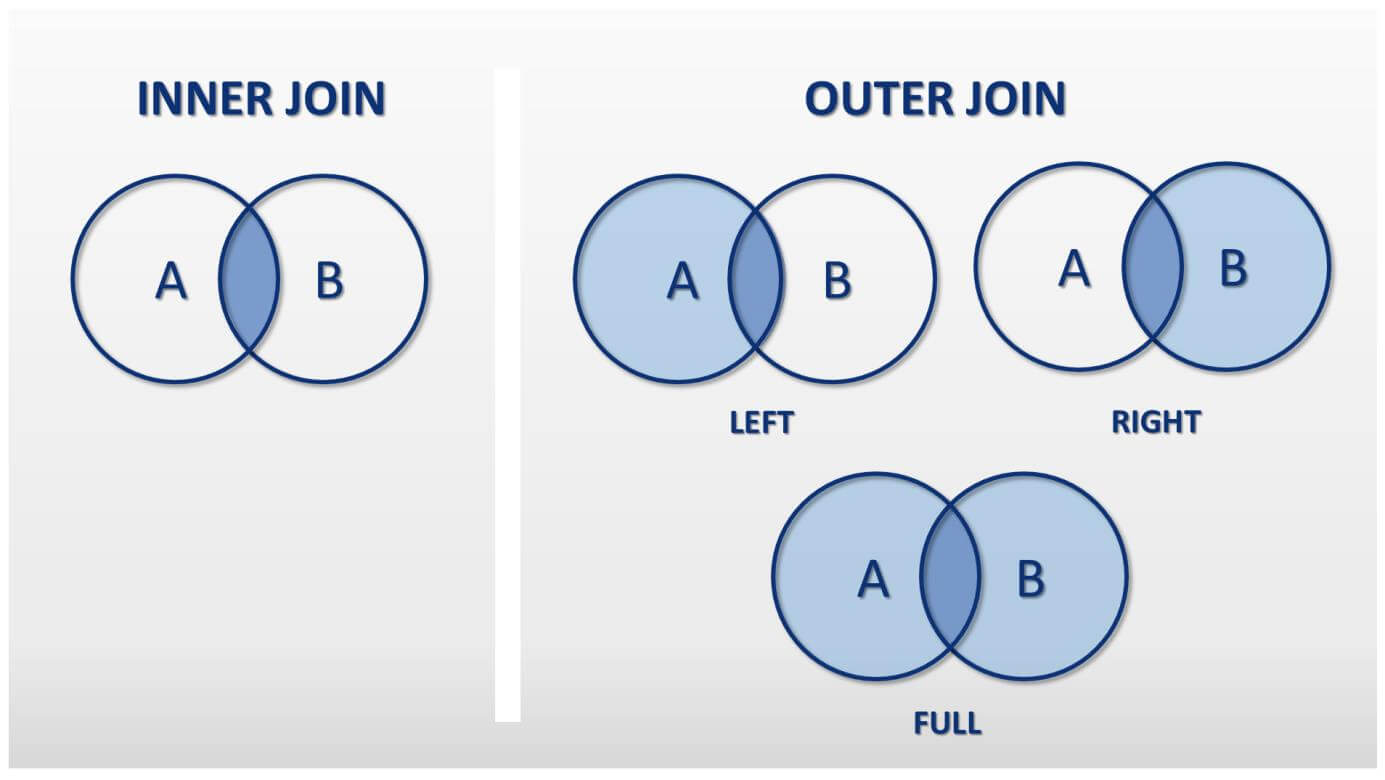

In [ ]:

# Outer: similar to a SQL full outer join;
df_sale = pd.merge(df_sale, df_inventory,
                   on=[u'Clave', u'Id Sucursal'], how='outer')

# Eliminamos dataframe inventory
del df_inventory

df_sale.head()

,Clave,Producto_x,Id Sucursal,Sucursal_x,Fecha Factura,Tipo Docto,Documento,Pedido,Fecha Pedido_x,Cliente,...,Subcanal,Cantidad,Importe s/impuesto,Importe c/impuesto,Sucursal_y,Producto_y,[Tipo stock],Existencia,Costo,Fecha Pedido_y
0,10000000219,BRA DON PEDRO 750ML,1203,BC. TIJUANA,20220330.0,5211 - CxC Factura,5211-165181,5211-1/0189273,2022-03-30,NATALIA FERNANDA CAPACETA BERNAL,...,CANTABRICO,1.0,81,134,BC. TIJUANA,BRA DON PEDRO 750ML,Stock de libre utilización,5.00,322.65,2022-03-30
1,10000000595,JE TIO PEPE 750ML,1203,BC. TIJUANA,20220330.0,ZCF2,6000733440,2000691789,2022-03-30,LORENZA ALIMENTOS S.A. DE C.V.,...,CANTABRICO,1.0,214,300,BC. TIJUANA,JE TIO PEPE 750ML,Stock de libre utilización,112.00,"21,575.68",2022-03-30
2,10000001872,BRA PRESIDENTE CLASICO 1.750 1LS,1203,BC. TIJUANA,20220330.0,5211 - CxC Factura,5211-165192,5211-2/0176267,2022-03-30,JORGE MARTIN NAVARRO JIMENEZ,...,CANTABRICO,2.0,274,452,NaN,NaN,NaN,NaN,NaN,NaN
3,10000004577,MEZ ZIGNUM PLATINUM JOVEN 700 ML,1203,BC. TIJUANA,20220330.0,ZCF2,6000733321,2000691684,2022-03-30,OPERADORA CANTINA EXPERIMENTAL S. DE R.L. DE C.V.,...,CANTABRICO,1.0,205,339,BC. TIJUANA,MEZ ZIGNUM PLATINUM JOVEN 700 ML,Stock de libre utilización,44.00,"9,034.52",2022-03-30
4,10000016711,LI LOS REYES 900ML,1203,BC. TIJUANA,20220330.0,5211 - CxC Factura,5211-165193,5211-1/0189300,2022-03-30,VENTAS AL PUBLICO EN GENERALTIJUANA,...,CANTABRICO,1.0,49,80,BC. TIJUANA,LI LOS REYES 900ML,Stock de libre utilización,28.00,"1,029.00",2022-03-30


In [ ]:
df_sale.columns.tolist()

['Clave',
 'Producto_x',
 'Id Sucursal',
 'Sucursal_x',
 'Fecha Factura',
 'Tipo Docto',
 'Documento',
 'Pedido',
 'Fecha Pedido_x',
 'Cliente',
 'No Cliente',
 'Grupo Cliente',
 'RFC',
 'Canal',
 'Subcanal',
 'Cantidad',
 'Importe s/impuesto',
 'Importe c/impuesto',
 'Sucursal_y',
 'Producto_y',
 '[Tipo stock]',
 'Existencia',
 'Costo',
 'Fecha Pedido_y']

In [ ]:
# Colocamos los nombres de las filas column_x and column_y a column
# Ejm: Sucursal_x y Sucursal_y: Sucursal
for col in df_sale.columns:
    if col.endswith('_x'):
        col_name = col[:-2]
        # Sucursal_x datos null, se reemplaza por los datos de sucursal_y
        df_sale.loc[df_sale[col].isnull(), col] = df_sale[f'{col_name}_y']
        del df_sale[f'{col_name}_y']
        df_sale = df_sale.rename(columns={col: col_name})

df_sale.columns.tolist()

['Clave',
 'Producto',
 'Id Sucursal',
 'Sucursal',
 'Fecha Factura',
 'Tipo Docto',
 'Documento',
 'Pedido',
 'Fecha Pedido',
 'Cliente',
 'No Cliente',
 'Grupo Cliente',
 'RFC',
 'Canal',
 'Subcanal',
 'Cantidad',
 'Importe s/impuesto',
 'Importe c/impuesto',
 '[Tipo stock]',
 'Existencia',
 'Costo']

In [ ]:
df_sale.head()

,Clave,Producto,Id Sucursal,Sucursal,Fecha Factura,Tipo Docto,Documento,Pedido,Fecha Pedido,Cliente,...,Grupo Cliente,RFC,Canal,Subcanal,Cantidad,Importe s/impuesto,Importe c/impuesto,[Tipo stock],Existencia,Costo
0,10000000219,BRA DON PEDRO 750ML,1203,BC. TIJUANA,20220330.0,5211 - CxC Factura,5211-165181,5211-1/0189273,2022-03-30,NATALIA FERNANDA CAPACETA BERNAL,...,-,CABN990713QD0,CANTABRICO,CANTABRICO,1.0,81,134,Stock de libre utilización,5.00,322.65
1,10000000595,JE TIO PEPE 750ML,1203,BC. TIJUANA,20220330.0,ZCF2,6000733440,2000691789,2022-03-30,LORENZA ALIMENTOS S.A. DE C.V.,...,CANTABRICO,LAL190315B94,CANTABRICO,CANTABRICO,1.0,214,300,Stock de libre utilización,112.00,"21,575.68"
2,10000001872,BRA PRESIDENTE CLASICO 1.750 1LS,1203,BC. TIJUANA,20220330.0,5211 - CxC Factura,5211-165192,5211-2/0176267,2022-03-30,JORGE MARTIN NAVARRO JIMENEZ,...,-,NAJJ690312969,CANTABRICO,CANTABRICO,2.0,274,452,NaN,NaN,NaN
3,10000004577,MEZ ZIGNUM PLATINUM JOVEN 700 ML,1203,BC. TIJUANA,20220330.0,ZCF2,6000733321,2000691684,2022-03-30,OPERADORA CANTINA EXPERIMENTAL S. DE R.L. DE C.V.,...,CANTABRICO,OCE141022HH6,CANTABRICO,CANTABRICO,1.0,205,339,Stock de libre utilización,44.00,"9,034.52"
4,10000016711,LI LOS REYES 900ML,1203,BC. TIJUANA,20220330.0,5211 - CxC Factura,5211-165193,5211-1/0189300,2022-03-30,VENTAS AL PUBLICO EN GENERALTIJUANA,...,-,XAXX010101000,CANTABRICO,CANTABRICO,1.0,49,80,Stock de libre utilización,28.00,"1,029.00"


In [ ]:
df_sale.dtypes

Clave                   int64
Producto               object
Id Sucursal            object
Sucursal               object
Fecha Factura         float64
Tipo Docto             object
Documento              object
Pedido                 object
Fecha Pedido           object
Cliente                object
No Cliente             object
Grupo Cliente          object
RFC                    object
Canal                  object
Subcanal               object
Cantidad              float64
Importe s/impuesto     object
Importe c/impuesto     object
[Tipo stock]           object
Existencia             object
Costo                  object
dtype: object

# **Tipo de datos y formato final**

In [ ]:

df_sale = df_sale.astype({'Clave': 'str'})

# Otra forma
# df_sale[u'Id Sucursal'] = df_sale[u'Id Sucursal'].astype(str)
# df_sale[u'Clave'] = df_sale[u'Clave'].astype(int).astype(str)


df_sale.dtypes

Clave                  object
Producto               object
Id Sucursal            object
Sucursal               object
Fecha Factura         float64
Tipo Docto             object
Documento              object
Pedido                 object
Fecha Pedido           object
Cliente                object
No Cliente             object
Grupo Cliente          object
RFC                    object
Canal                  object
Subcanal               object
Cantidad              float64
Importe s/impuesto     object
Importe c/impuesto     object
[Tipo stock]           object
Existencia             object
Costo                  object
dtype: object

In [ ]:
# Error convertir a float
# df_sale['column'] = df_sale['Existencia'].astype(float)

In [ ]:
# Eliminamos caracter "," para convertir los datos a float
def clean_number(nbr):
    """
    Removes thousand separators and replaces the decimal for '.'
    >> 1,234.00
    @return 1234
    """
    nbr = str(nbr).strip()
    nbr = nbr.replace(',', '')
    
    return nbr


columns_clean_number = ['Importe s/impuesto', 'Existencia']

for column in columns_clean_number:
    df_sale[column] = df_sale[column].apply(lambda x: clean_number(x))
    df_sale[column] = df_sale[column].astype(float)

# Otra forma
# df['Existencia'] = df['Existencia'].str.replace(',', '')

df_sale.dtypes


Clave                  object
Producto               object
Id Sucursal            object
Sucursal               object
Fecha Factura         float64
Tipo Docto             object
Documento              object
Pedido                 object
Fecha Pedido           object
Cliente                object
No Cliente             object
Grupo Cliente          object
RFC                    object
Canal                  object
Subcanal               object
Cantidad              float64
Importe s/impuesto    float64
Importe c/impuesto     object
[Tipo stock]           object
Existencia            float64
Costo                  object
dtype: object

In [ ]:
# Formateamos con las columnas necesarias
list_columns = ['Clave', 'Producto', 'Id Sucursal', 'Fecha Pedido', 'Cantidad',
                'Importe s/impuesto', 'Existencia']
df_sale = df_sale.reindex(list_columns, axis=1)
df_sale.columns.tolist()


['Clave',
 'Producto',
 'Id Sucursal',
 'Fecha Pedido',
 'Cantidad',
 'Importe s/impuesto',
 'Existencia']

In [ ]:
df_sale.head()

,Clave,Producto,Id Sucursal,Fecha Pedido,Cantidad,Importe s/impuesto,Existencia
0,10000000219,BRA DON PEDRO 750ML,1203,2022-03-30,1.0,81.0,5.0
1,10000000595,JE TIO PEPE 750ML,1203,2022-03-30,1.0,214.0,112.0
2,10000001872,BRA PRESIDENTE CLASICO 1.750 1LS,1203,2022-03-30,2.0,274.0,NaN
3,10000004577,MEZ ZIGNUM PLATINUM JOVEN 700 ML,1203,2022-03-30,1.0,205.0,44.0
4,10000016711,LI LOS REYES 900ML,1203,2022-03-30,1.0,49.0,28.0


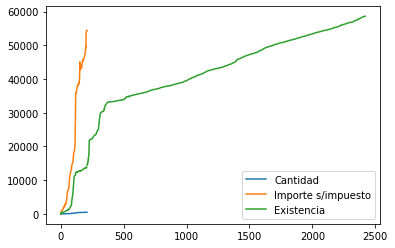

In [ ]:
# Suma acumulativa y gráfica de venta en dinero, venta unidades y stock
df_sale.cumsum().plot()

# **Guardamos el archivo**


In [ ]:
df_sale.to_csv(f'output/{fecha}.csv', index=False, encoding='utf-8')

df_sale.head()


,Clave,Producto,Id Sucursal,Fecha Pedido,Cantidad,Importe s/impuesto,Existencia
0,10000000219,BRA DON PEDRO 750ML,1203,2022-03-30,1.0,81.0,5.0
1,10000000595,JE TIO PEPE 750ML,1203,2022-03-30,1.0,214.0,112.0
2,10000001872,BRA PRESIDENTE CLASICO 1.750 1LS,1203,2022-03-30,2.0,274.0,NaN
3,10000004577,MEZ ZIGNUM PLATINUM JOVEN 700 ML,1203,2022-03-30,1.0,205.0,44.0
4,10000016711,LI LOS REYES 900ML,1203,2022-03-30,1.0,49.0,28.0


In [ ]:
# Eliminaos los archivos
"""
for file_ in glob(f'decompress/*/*'):
    os.remove(file_)

# Eliminamos directorio
for direct_ in glob(f'decompress/*'):
    print(direct_)
    os.rmdir(direct_)
"""

"\nfor file_ in glob(f'decompress/*/*'):\n    os.remove(file_)\n\n# Eliminamos directorio\nfor direct_ in glob(f'decompress/*'):\n    print(direct_)\n    os.rmdir(direct_)\n"